# 0. Setup and Load Data

In [39]:
import pandas as pd

In [40]:
try:
    df_train = pd.read_csv('/workspaces/banking-leads-conversion/data/ml_train/train_loan/train.csv')
    df_test = pd.read_csv('/workspaces/banking-leads-conversion/data/ml_train/test_loan/test.csv')
    print('Datasets loaded')
except Exception as e:
    print(f'Error type: {type(e).__name__}')
    print(f'Error message: {e}')


Datasets loaded


# 1. Dataset Visualization

## 1.1 Train

An equated monthly installment (EMI) is a fixed payment amount made by a borrower to a lender at a specified date each calendar month. 

In [41]:
df_train.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [42]:
df_train.shape

(69713, 22)

In [43]:
df_train.columns

Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved'],
      dtype='object')

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

In [45]:
df_train.describe()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
count,65415.000000,6.971300e+04,69662.000000,42004.000000,42004.000000,22276.000000,22276.000000,69713.000000,69713.000000
mean,3.720187,5.622283e+03,360.928751,39429.982859,3.890629,19.213570,1101.466242,3.948446,0.014631
std,0.807374,1.747671e+05,2288.517927,30727.595990,1.167491,5.847136,752.661394,3.819214,0.120073
min,1.000000,0.000000e+00,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000,0.000000
25%,4.000000,1.650000e+03,0.000000,20000.000000,3.000000,15.250000,649.000000,0.000000,0.000000
50%,4.000000,2.500000e+03,0.000000,30000.000000,4.000000,18.000000,941.000000,2.000000,0.000000
75%,4.000000,4.000000e+03,350.000000,50000.000000,5.000000,20.000000,1295.000000,7.000000,0.000000
max,4.000000,3.838384e+07,545436.500000,300000.000000,6.000000,37.000000,13556.000000,10.000000,1.000000


### Load Amount

In [46]:
print((df_train['Loan_Amount'].isnull().sum()/df_train.shape[0]).round(3))

0.397


In [47]:
# Display rows where 'Loan_Amount' is null
df_train[df_train['Loan_Amount'].isnull()].describe()


,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
count,23679.000000,27709.000000,27682.000000,0.0,0.0,0.0,0.0,27709.000000,27709.000000
mean,3.792305,2830.736818,505.128441,NaN,NaN,NaN,NaN,1.203039,0.006316
std,0.693951,7271.402798,1267.448818,NaN,NaN,NaN,NaN,2.919729,0.079221
min,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,4.000000,1200.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,4.000000,1752.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,4.000000,3000.000000,500.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
max,4.000000,859565.600000,42000.000000,NaN,NaN,NaN,NaN,10.000000,1.000000


In [48]:
df_train[~df_train['Loan_Amount'].isnull()].describe()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
count,41736.000000,4.200400e+04,41980.000000,42004.000000,42004.000000,22276.000000,22276.000000,42004.000000,42004.000000
mean,3.679270,7.463797e+03,265.842143,39429.982859,3.890629,19.213570,1101.466242,5.759523,0.020117
std,0.862469,2.250542e+05,2758.422939,30727.595990,1.167491,5.847136,752.661394,3.214502,0.140403
min,1.000000,2.600000e+00,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000,0.000000
25%,4.000000,2.000000e+03,0.000000,20000.000000,3.000000,15.250000,649.000000,2.000000,0.000000
50%,4.000000,2.800000e+03,0.000000,30000.000000,4.000000,18.000000,941.000000,7.000000,0.000000
75%,4.000000,4.400000e+03,250.000000,50000.000000,5.000000,20.000000,1295.000000,10.000000,0.000000
max,4.000000,3.838384e+07,545436.500000,300000.000000,6.000000,37.000000,13556.000000,10.000000,1.000000


Since the proportion of null values for Loan Amount is high, 39%, imputation will be tested in the model's performance.

In [49]:
import pandas as pd

def impute_and_exclude_nulls(df):
    """
    Imputes missing values and excludes null rows in a DataFrame.
    
    This function performs the following tasks:
    1. Imputes missing values for crucial numerical features with their medians.
    2. Imputes missing values for categorical features with their modes.
    3. Saves the imputed DataFrame as df_imputed.
    4. Excludes all rows with any remaining null values and saves as df_cleaned.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing missing values.

    Returns:
    tuple: A tuple containing:
        - df_imputed (pd.DataFrame): DataFrame with imputed values.
        - df_cleaned (pd.DataFrame): DataFrame after excluding all null rows.
    """

    # Fill missing values for numerical features
    df['Loan_Amount'] = df['Loan_Amount'].fillna(df['Loan_Amount'].median())
    df['Loan_Period'] = df['Loan_Period'].fillna(df['Loan_Period'].median())

    # Fill missing values for categorical features
    df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
    
    # Save the imputed DataFrame
    df_imputed = df.copy()

    # Drop any remaining rows with null values
    df_cleaned = df.dropna()

    return df_imputed, df_cleaned

In [50]:
df_train.columns

Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved'],
      dtype='object')

In [51]:
df_imputed, df_cleaned = impute_and_exclude_nulls(df_train)

## 1.2 EDA

Since we have divided into two datasets: df_imputed and df_cleaned, let's compare both.

### Imputed

In [52]:
df_imputed.dtypes

ID                                      object
Gender                                  object
DOB                                     object
Lead_Creation_Date                      object
City_Code                               object
City_Category                           object
Employer_Code                           object
Employer_Category1                      object
Employer_Category2                     float64
Monthly_Income                         float64
Customer_Existing_Primary_Bank_Code     object
Primary_Bank_Type                       object
Contacted                               object
Source                                  object
Source_Category                         object
Existing_EMI                           float64
Loan_Amount                            float64
Loan_Period                            float64
Interest_Rate                          float64
EMI                                    float64
Var1                                     int64
Approved     

In [53]:
df_imputed.describe()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
count,65415.000000,6.971300e+04,69662.000000,69713.000000,69713.000000,22276.000000,22276.000000,69713.000000,69713.000000
mean,3.720187,5.622283e+03,360.928751,35681.824050,3.934101,19.213570,1101.466242,3.948446,0.014631
std,0.807374,1.747671e+05,2288.517927,24293.802244,0.907812,5.847136,752.661394,3.819214,0.120073
min,1.000000,0.000000e+00,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000,0.000000
25%,4.000000,1.650000e+03,0.000000,30000.000000,4.000000,15.250000,649.000000,0.000000,0.000000
50%,4.000000,2.500000e+03,0.000000,30000.000000,4.000000,18.000000,941.000000,2.000000,0.000000
75%,4.000000,4.000000e+03,350.000000,36000.000000,4.000000,20.000000,1295.000000,7.000000,0.000000
max,4.000000,3.838384e+07,545436.500000,300000.000000,6.000000,37.000000,13556.000000,10.000000,1.000000


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class EDAVisualizer:
    def __init__(self, df):
        self.df = df
        self.df['DOB'] = pd.to_datetime(self.df['DOB'], errors='coerce')
        self.df['Age'] = (pd.Timestamp.now() - self.df['DOB']).dt.days // 365
        sns.set_style("whitegrid")

    def plot_gender_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.df, x='Gender', hue='Approved')
        plt.yscale('log')
        plt.title('Gender Distribution vs Approval Status')
        plt.xlabel('Gender')
        plt.ylabel('Count')
        plt.legend(title='Approved')
        plt.show()

    def plot_age_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(data=self.df, x='Age', hue='Approved', kde=True)
        plt.title('Age Distribution vs Approval Status')
        plt.xlabel('Age')
        plt.ylabel('Density')
        plt.legend(title='Approved')
        plt.show()

    def plot_monthly_income_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(data=self.df, x='Monthly_Income', hue='Approved', kde=True)
        plt.yscale('log')
        plt.title('Monthly Income Distribution vs Approval Status')
        plt.xlabel('Monthly Income')
        plt.ylabel('Density')
        plt.legend(title='Approved')
        plt.show()

    def plot_loan_amount_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(data=self.df, x='Loan_Amount', hue='Approved', kde=True)
        plt.yscale('log')
        plt.title('Loan Amount Distribution vs Approval Status')
        plt.xlabel('Loan Amount')
        plt.ylabel('Density')
        plt.legend(title='Approved')
        plt.show()

    def plot_loan_period_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(data=self.df, x='Loan_Period', hue='Approved', kde=True)
        plt.yscale('log')
        plt.title('Loan Period Distribution vs Approval Status')
        plt.xlabel('Loan Period')
        plt.ylabel('Density')
        plt.legend(title='Approved')
        plt.show()

    def plot_interest_rate_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(data=self.df, x='Interest_Rate', hue='Approved', kde=True)
        plt.yscale('log')
        plt.title('Interest Rate Distribution vs Approval Status')
        plt.xlabel('Interest Rate')
        plt.ylabel('Density')
        plt.legend(title='Approved')
        plt.show()

    def plot_emi_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(data=self.df, x='EMI', hue='Approved', kde=True)
        plt.yscale('log')
        plt.title('EMI Distribution vs Approval Status')
        plt.xlabel('EMI')
        plt.ylabel('Density')
        plt.legend(title='Approved')
        plt.show()

    def plot_city_category_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.df, x='City_Category', hue='Approved')
        plt.yscale('log')
        plt.title('City Category Distribution vs Approval Status')
        plt.xlabel('City Category')
        plt.ylabel('Count')
        plt.legend(title='Approved')
        plt.show()

    def plot_employer_category1_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.df, x='Employer_Category1', hue='Approved')
        plt.yscale('log')
        plt.title('Employer Category1 Distribution vs Approval Status')
        plt.xlabel('Employer Category1')
        plt.ylabel('Count')
        plt.legend(title='Approved')
        plt.show()
    
    def plot_contacted_status_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.df, x='Contacted', hue='Approved')
        plt.yscale('log')
        plt.title('Contacted Status Distribution vs Approval Status')
        plt.xlabel('Contacted')
        plt.ylabel('Count')
        plt.legend(title='Approved')
        plt.show()


/tmp/ipykernel_30244/1926168096.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df['DOB'] = pd.to_datetime(self.df['DOB'], errors='coerce')


/tmp/ipykernel_30244/1926168096.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['DOB'] = pd.to_datetime(self.df['DOB'], errors='coerce')
/tmp/ipykernel_30244/1926168096.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['Age'] = (pd.Timestamp.now() - self.df['DOB']).dt.days // 365


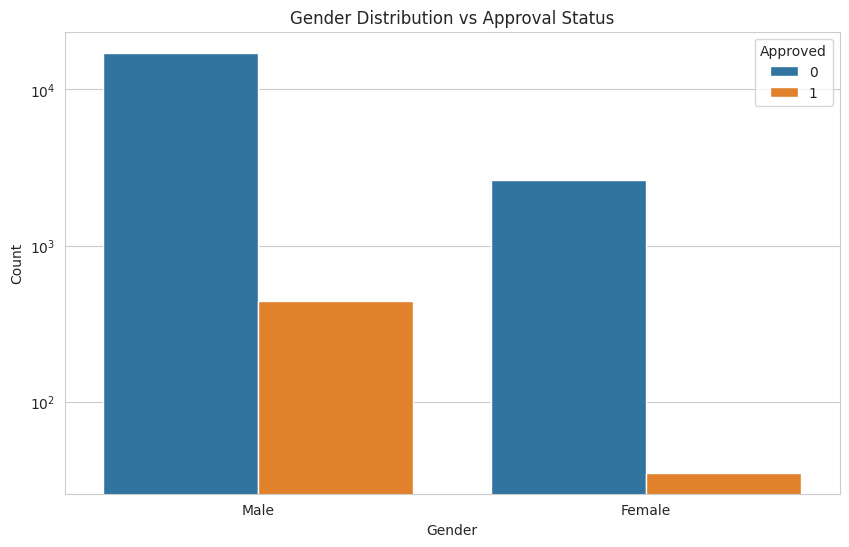

/tmp/ipykernel_30244/1926168096.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Approved')


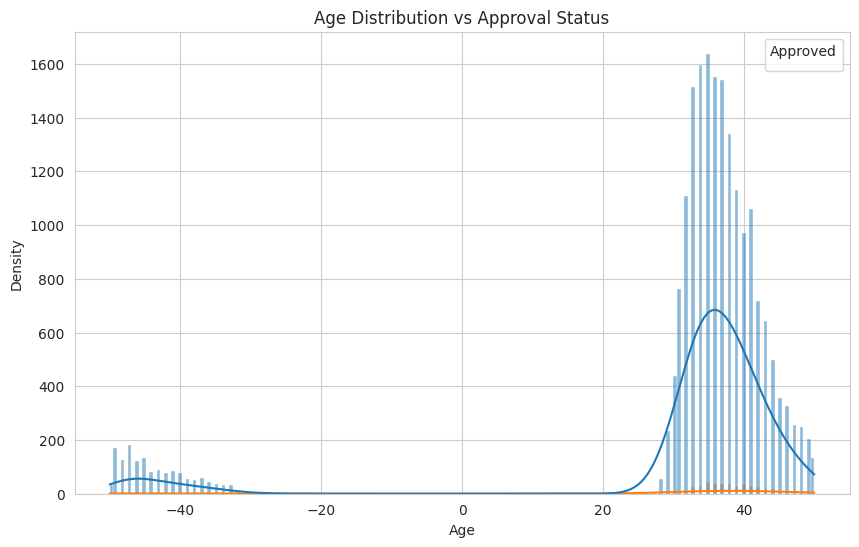

/tmp/ipykernel_30244/1926168096.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Approved')


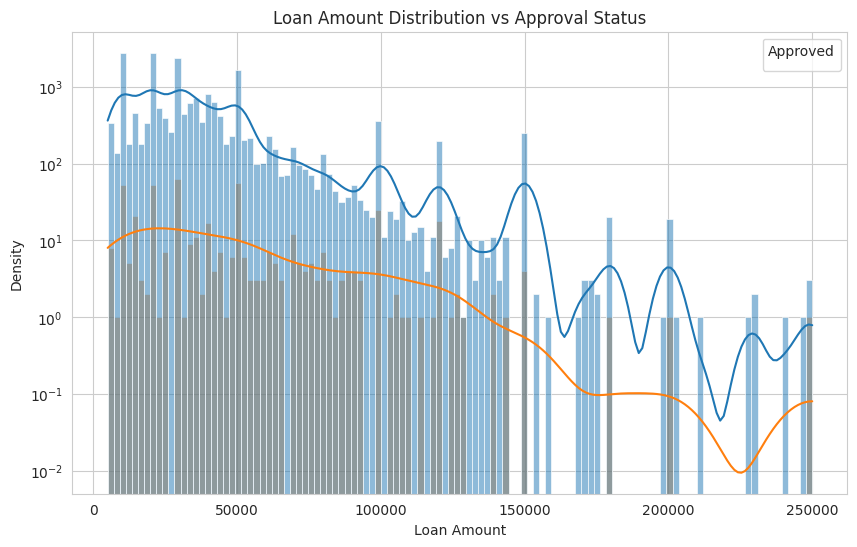

/tmp/ipykernel_30244/1926168096.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Approved')


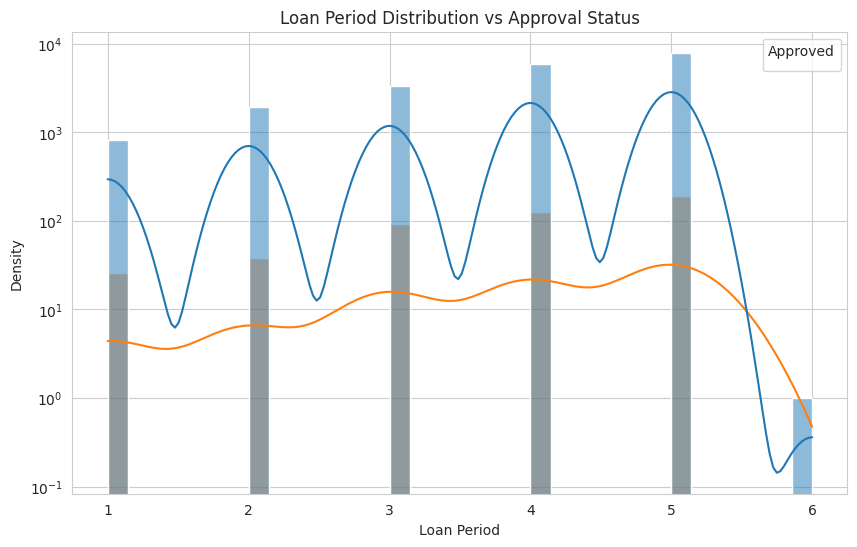

/tmp/ipykernel_30244/1926168096.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Approved')


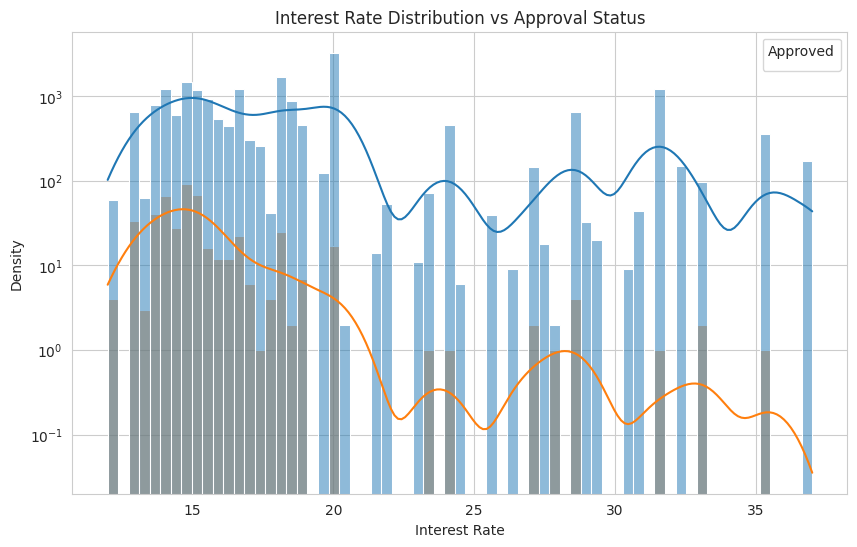

/tmp/ipykernel_30244/1926168096.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Approved')


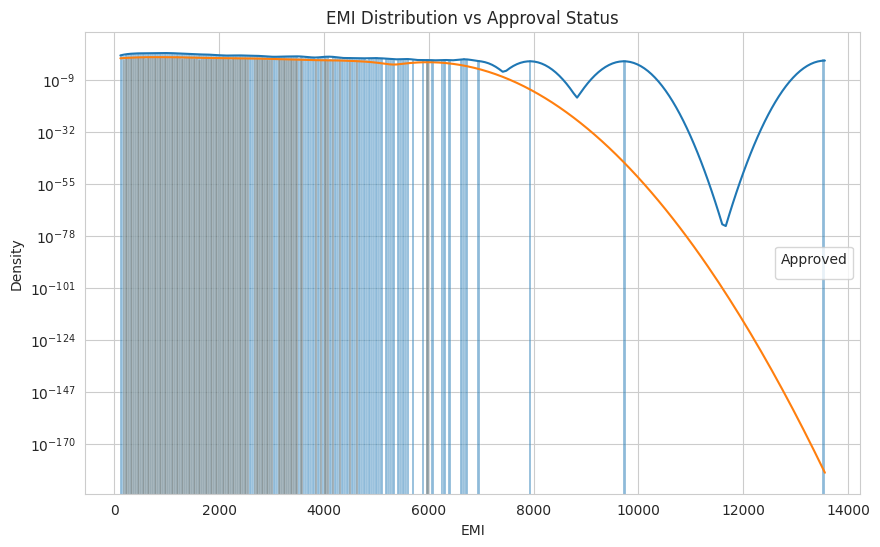

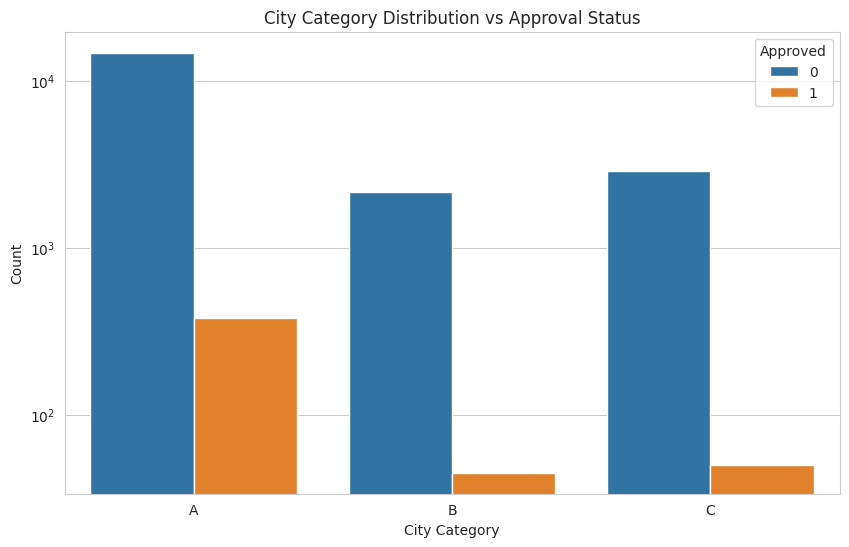

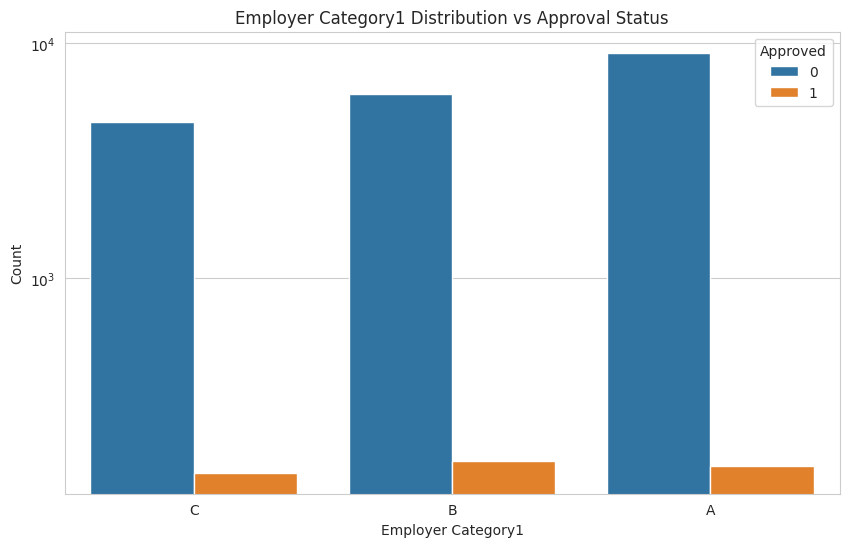

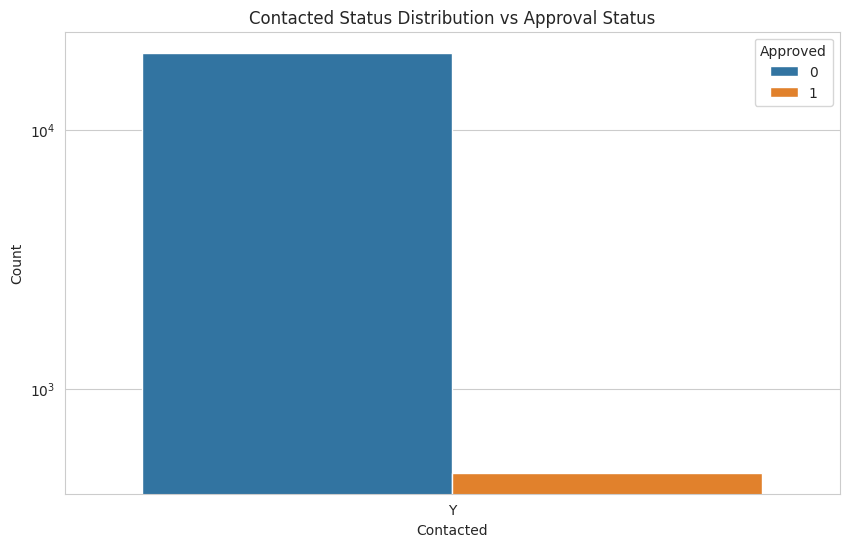

In [55]:
# Usage example
visualizer = EDAVisualizer(df_cleaned)
visualizer.plot_gender_distribution()
visualizer.plot_age_distribution()
#visualizer.plot_monthly_income_distribution()
visualizer.plot_loan_amount_distribution()
visualizer.plot_loan_period_distribution()
visualizer.plot_interest_rate_distribution()
visualizer.plot_emi_distribution()
visualizer.plot_city_category_distribution()
visualizer.plot_employer_category1_distribution()
visualizer.plot_contacted_status_distribution()

/tmp/ipykernel_30244/1926168096.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df['DOB'] = pd.to_datetime(self.df['DOB'], errors='coerce')


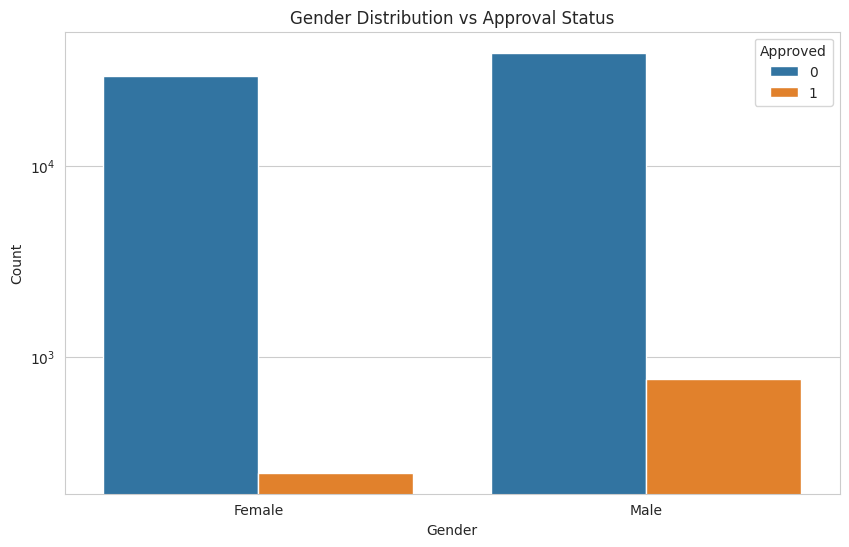

/tmp/ipykernel_30244/1926168096.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Approved')


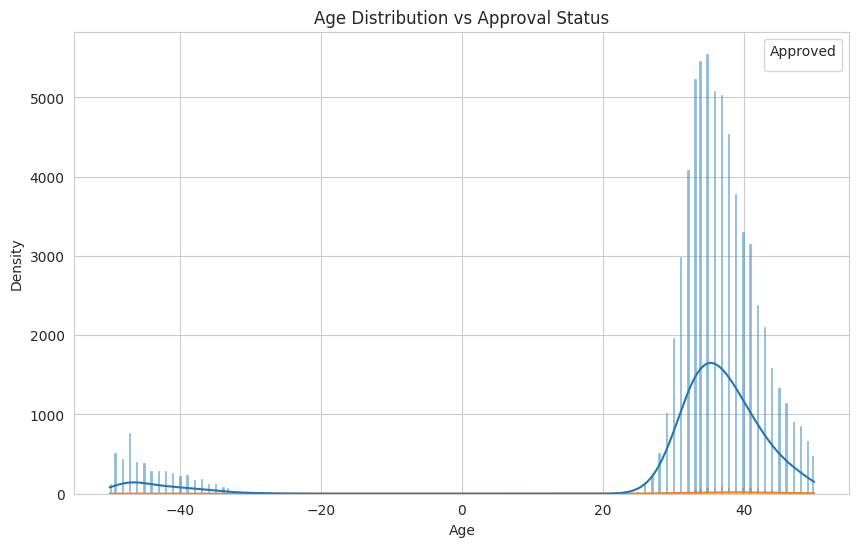

/tmp/ipykernel_30244/1926168096.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Approved')


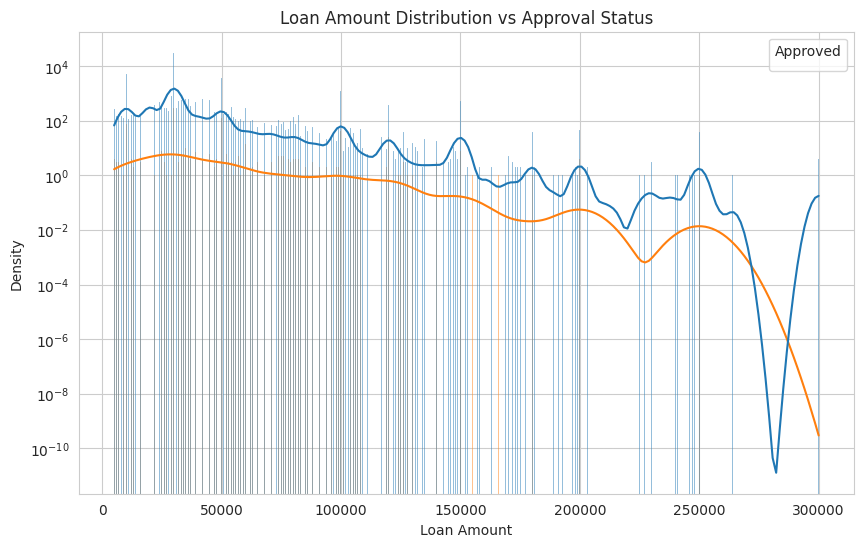

/tmp/ipykernel_30244/1926168096.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Approved')


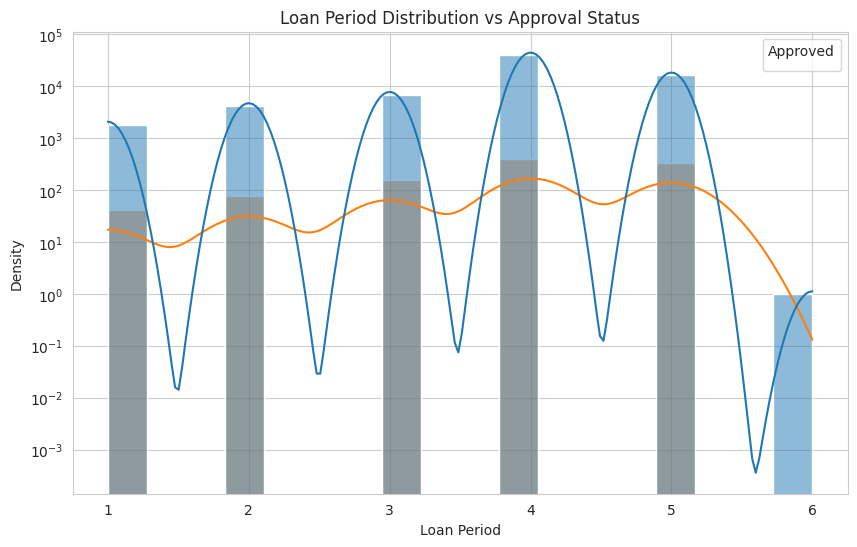

/tmp/ipykernel_30244/1926168096.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Approved')


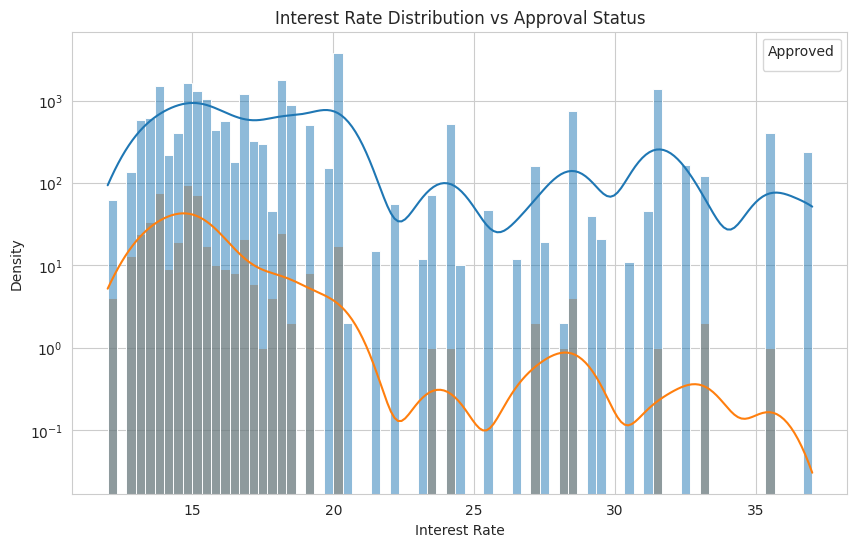

/tmp/ipykernel_30244/1926168096.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Approved')


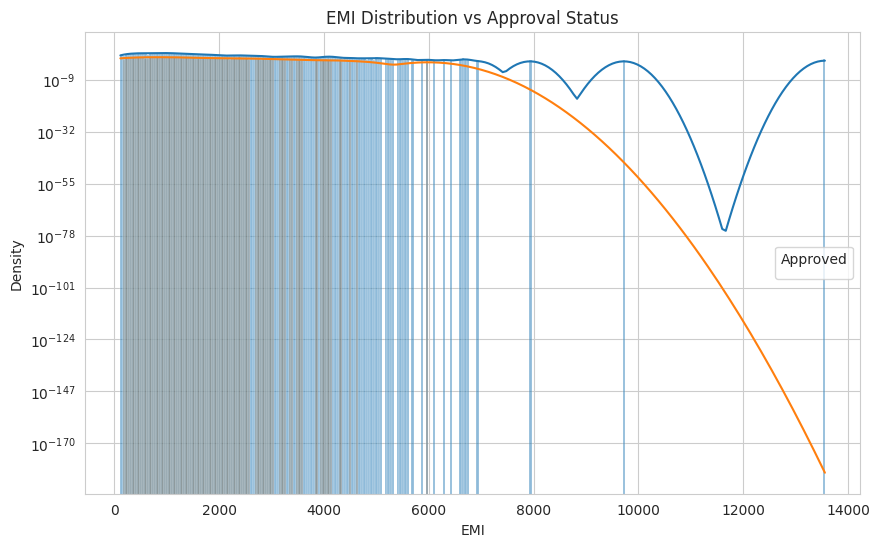

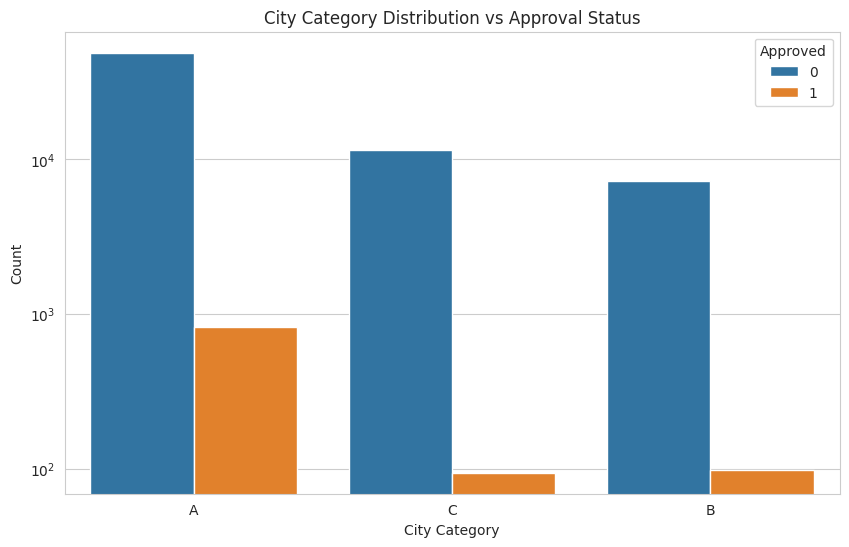

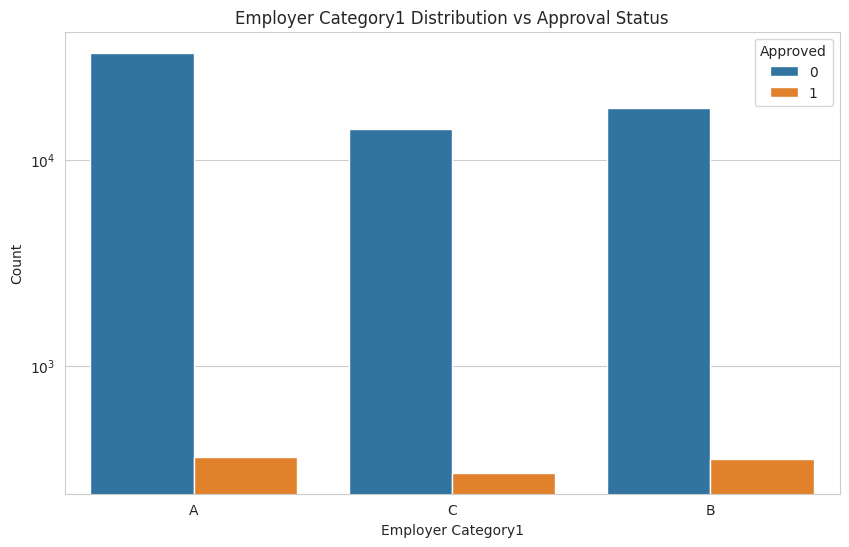

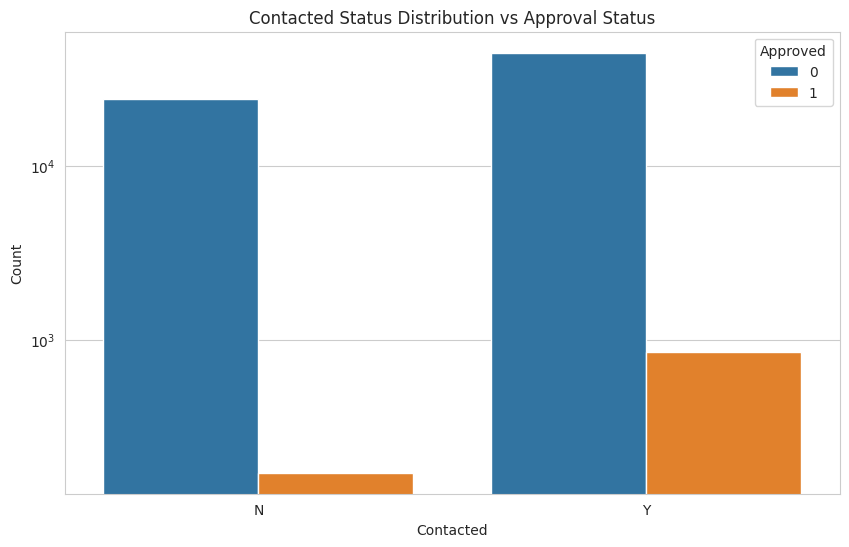

In [56]:
# Usage example
visualizer = EDAVisualizer(df_imputed)
visualizer.plot_gender_distribution()
visualizer.plot_age_distribution()
#visualizer.plot_monthly_income_distribution()
visualizer.plot_loan_amount_distribution()
visualizer.plot_loan_period_distribution()
visualizer.plot_interest_rate_distribution()
visualizer.plot_emi_distribution()
visualizer.plot_city_category_distribution()
visualizer.plot_employer_category1_distribution()
visualizer.plot_contacted_status_distribution()

/tmp/ipykernel_30244/1926168096.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df['DOB'] = pd.to_datetime(self.df['DOB'], errors='coerce')


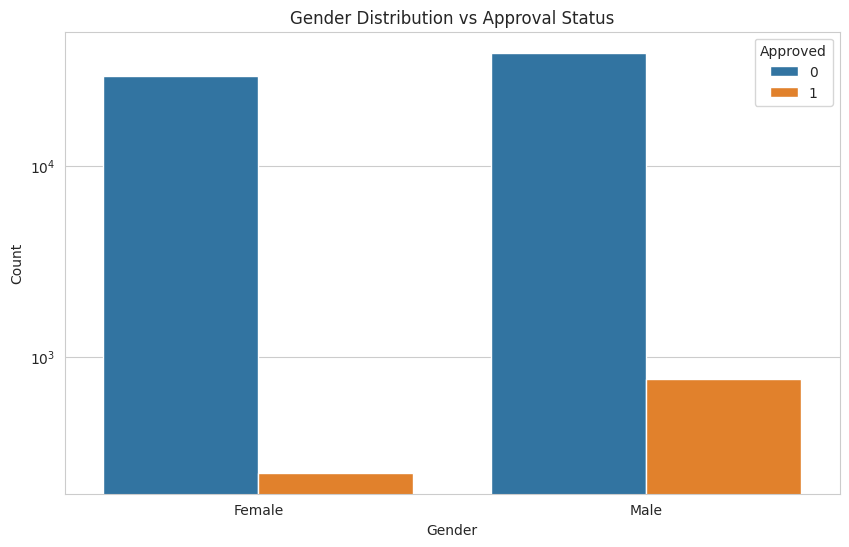

/tmp/ipykernel_30244/1926168096.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Approved')


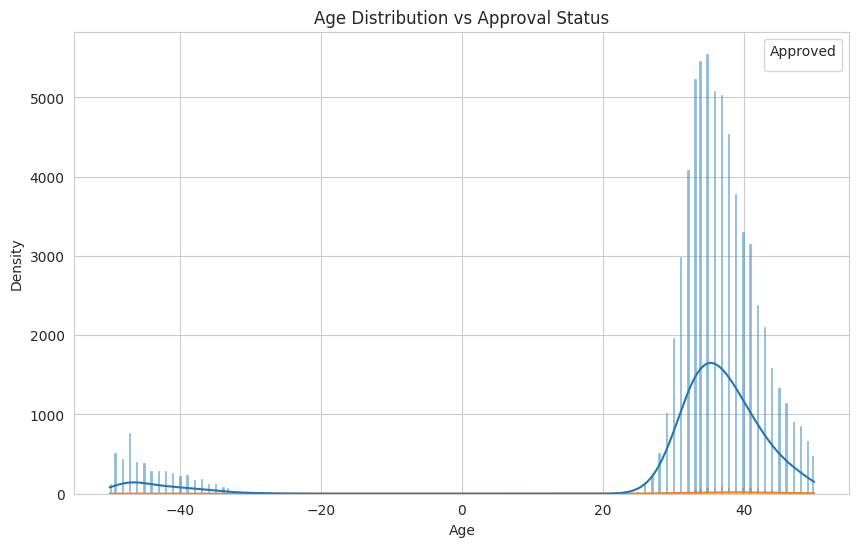

/tmp/ipykernel_30244/1926168096.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Approved')


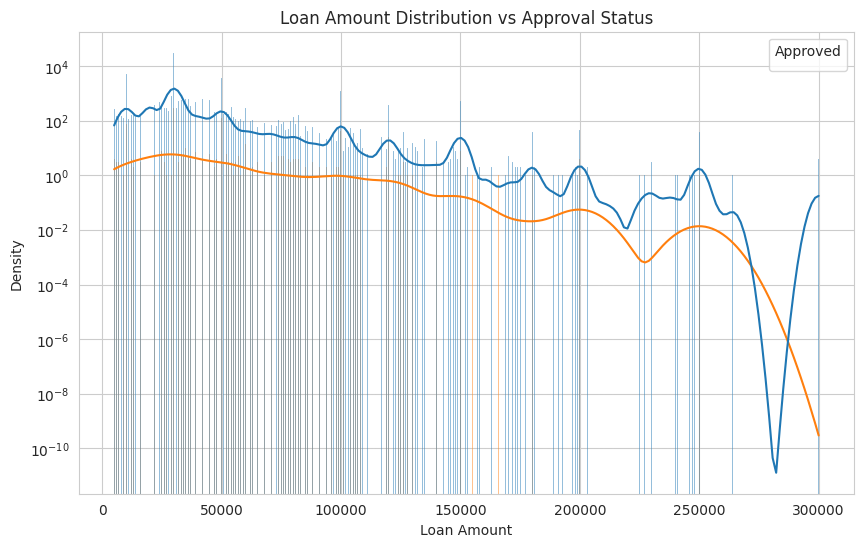

/tmp/ipykernel_30244/1926168096.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Approved')


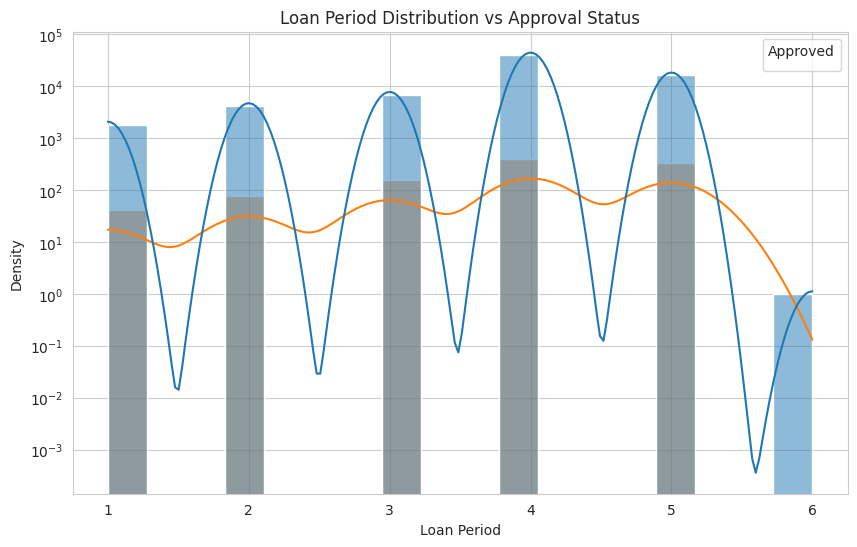

/tmp/ipykernel_30244/1926168096.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Approved')


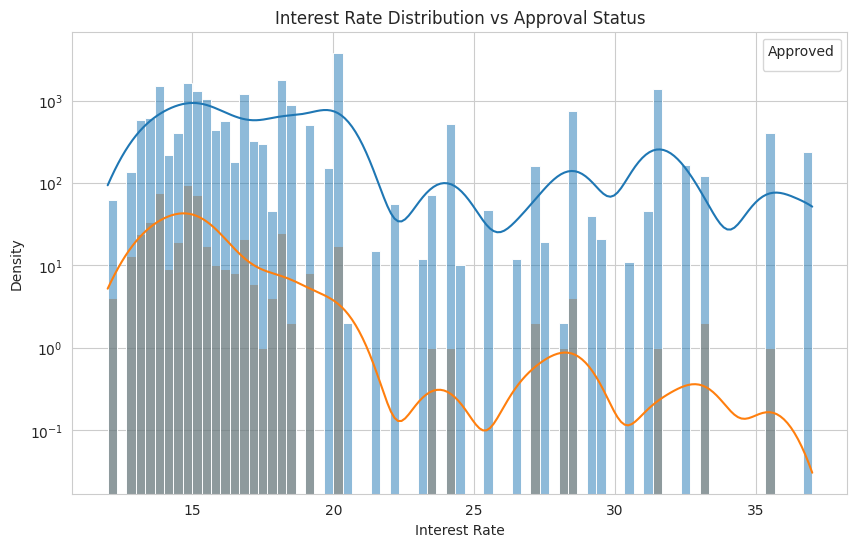

/tmp/ipykernel_30244/1926168096.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Approved')


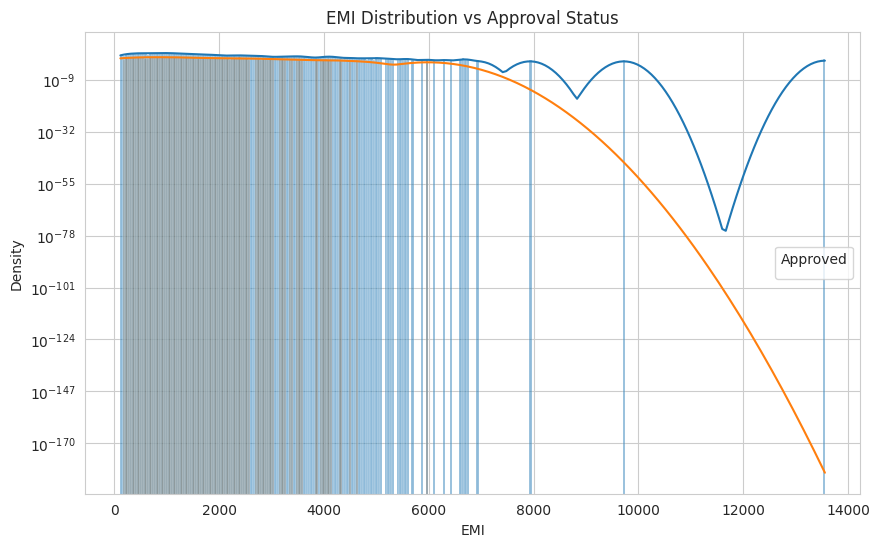

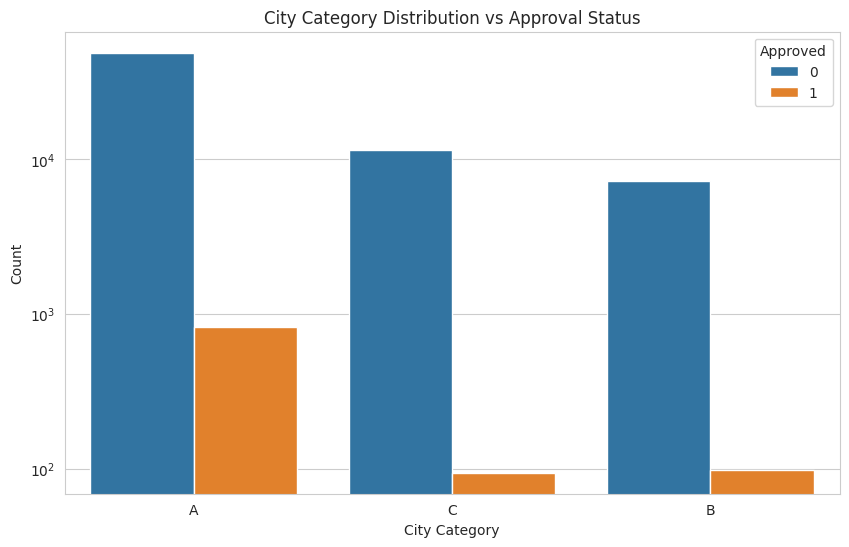

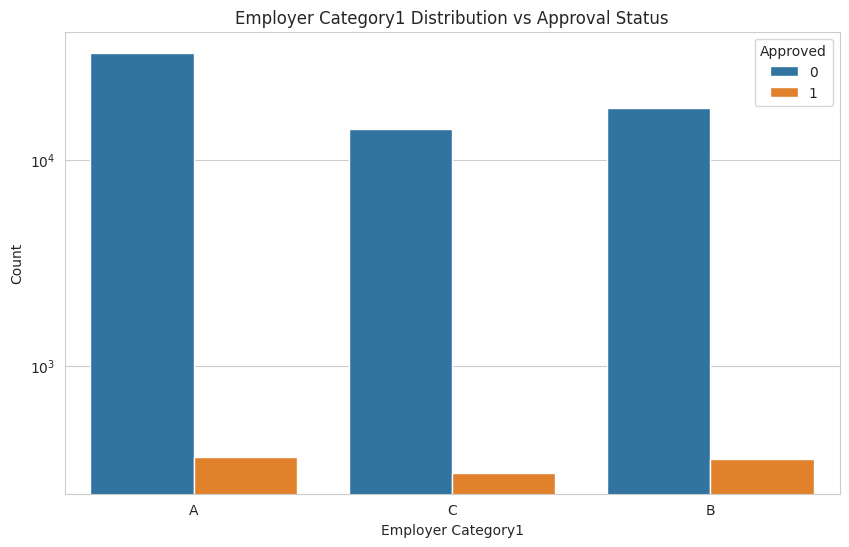

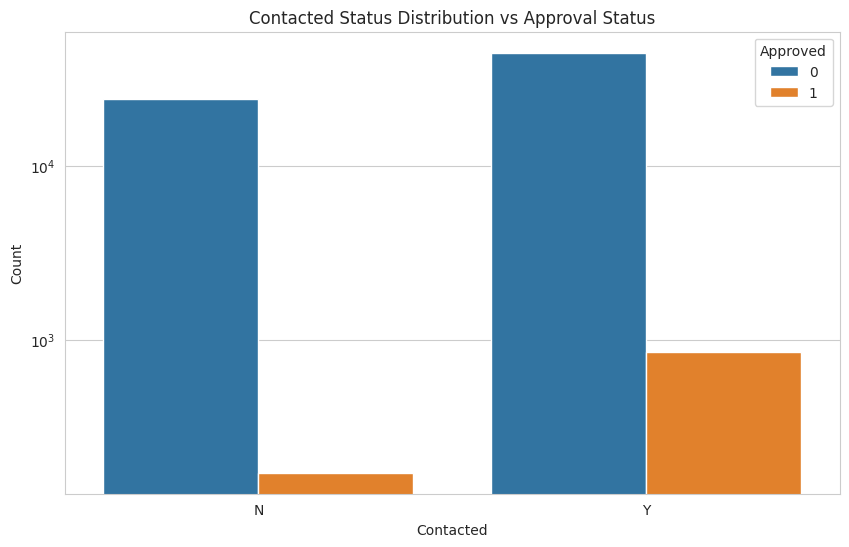

In [57]:
# Usage example
visualizer = EDAVisualizer(df_train)
visualizer.plot_gender_distribution()
visualizer.plot_age_distribution()
#visualizer.plot_monthly_income_distribution()
visualizer.plot_loan_amount_distribution()
visualizer.plot_loan_period_distribution()
visualizer.plot_interest_rate_distribution()
visualizer.plot_emi_distribution()
visualizer.plot_city_category_distribution()
visualizer.plot_employer_category1_distribution()
visualizer.plot_contacted_status_distribution()